# Chapter 8 In-Chapter Examples

In [ ]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 8.1: Pie charts 

In [3]:
# how to get equal areas for some number of pie slices
k = 2
np.tile(1/k,k)

array([0.5, 0.5])

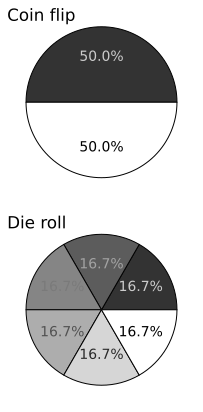

In [4]:
_,axs = plt.subplots(2,1,figsize=(4,6))

for a,k in zip(axs,[2,6]):

  # draw the pie (and export the patches and text to update the color)
  patches,_,autotexts = a.pie(np.tile(1/k,k),autopct='%.1f%%',wedgeprops={'edgecolor':'k'},
        colors=np.linspace((.2,.2,.2),(1,1,1),k))

  for autotext, patch in zip(autotexts,patches):
    inverse_color = 1 - np.array(patch.get_facecolor())
    inverse_color[-1] = 1 # invert the color, but not the alpha
    autotext.set_color(inverse_color)

axs[0].set_title('Coin flip',y=.9)
axs[1].set_title('Die roll',y=.9)

plt.tight_layout()
plt.show()

### Fig 8.4: Visualizing probability masses and densities

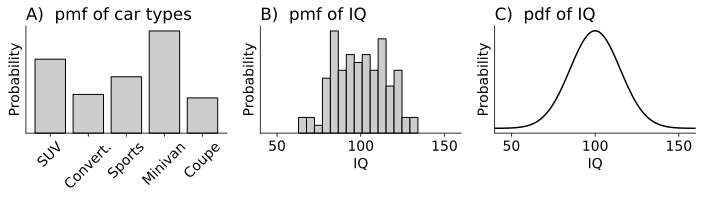

In [6]:
# categorical probability data
categoryLabels = [ 'SUV','Convert.','Sports','Minivan','Coupe' ]
categoryData = np.random.randint(low=5,high=30,size=len(categoryLabels)).astype(np.float64)
categoryData /= np.sum(categoryData)

# discrete numerical probability data
empiricalIQ = np.random.normal(loc=100,scale=15,size=100)

# continuous (analytic) probability data
x = np.linspace(-4,4,101)
continuousData = stats.norm.pdf(x)*15 + 100


### visualize!
_,axs = plt.subplots(1,3,figsize=(10,3))

# categorical data in bars
axs[0].bar(categoryLabels,categoryData,color=[.8,.8,.8],edgecolor='k')
axs[0].set_title(r'A)  pmf of car types')
axs[0].set(ylabel='Probability',yticks=[])
axs[0].tick_params(axis='x',rotation=45)

# empirical probability data that estimate a density, still in bars
axs[1].hist(empiricalIQ,bins=15,color=[.8,.8,.8],edgecolor='k')
axs[1].set(xlabel='IQ',ylabel='Probability',yticks=[],xlim=[40,160])
axs[1].set_title(r'B)  pmf of IQ')

# analytical probability density as a line
axs[2].plot(x*15+100,continuousData,'k')
axs[2].set(xlabel='IQ',ylabel='Probability',yticks=[],xlim=[40,160])
axs[2].set_title(r'C)  pdf of IQ')

plt.tight_layout()
plt.show()

### Fig 8.5: Probability mass function of penguin weights

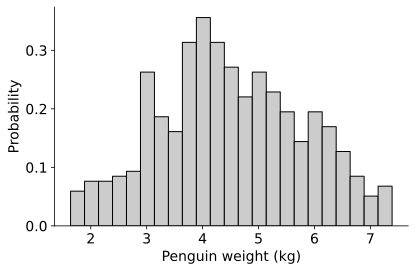

In [7]:
penguins = np.arctanh(np.random.uniform(size=473)*1.8-.9)*2+4.5

bin_edges = np.arange(np.min(penguins),np.max(penguins),step=.25)

plt.figure(figsize=(6,4))
plt.hist(penguins,bins=bin_edges,density=True,
         color=[.8,.8,.8],edgecolor='k')
plt.xlabel('Penguin weight (kg)')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

### Fig 8.6: pdf and cdf

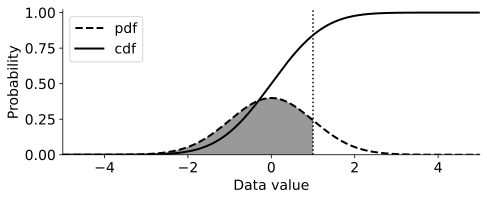

In [8]:
# distribution
x = np.linspace(-5,5,501)
pdf = stats.norm.pdf(x)
cdf = stats.norm.cdf(x)


_,ax = plt.subplots(1,figsize=(7,3))

# patch for the summed area
from matplotlib.patches import Polygon
bndi = np.argmin(np.abs(x-1))
dots = np.zeros((bndi+2,2))
for i in range(bndi+1):
  dots[i,:] = x[i],pdf[i]
dots[-1,:] = x[bndi],0
ax.add_patch(Polygon(dots[:,[0,1]],facecolor='k',alpha=.4))

# plot the functions
ax.plot(x,pdf,'k--',linewidth=2,label='pdf')
ax.plot(x,cdf,'k',linewidth=2,label='cdf')
ax.axvline(1,color='k',linestyle=':')

# make the plot a bit nicer
ax.set(xlim=x[[0,-1]],ylim=[0,1.02],xlabel='Data value',ylabel='Probability')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Fig 8.7: pdf/cdf combos of some example distributions

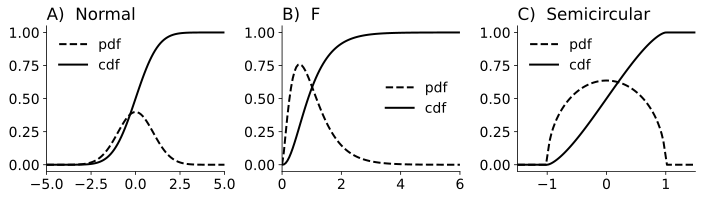

In [11]:
_,axs = plt.subplots(1,3,figsize=(10,3))

# Gaussian
x = np.linspace(-5,5,101)
axs[0].plot(x,stats.norm.pdf(x),'k--',linewidth=2)
axs[0].plot(x,stats.norm.cdf(x),'k',linewidth=2)
axs[0].set_title(r'A)  Normal')
axs[0].set_xlim(x[[0,-1]])

# F
x = np.linspace(0,6,101)
axs[1].plot(x,stats.f.pdf(x,5,100),'k--',linewidth=2)
axs[1].plot(x,stats.f.cdf(x,5,100),'k',linewidth=2)
axs[1].set_title(r'B)  F')
axs[1].set_xlim(x[[0,-1]])

# semicircular
x = np.linspace(-1.5,1.5,101)
axs[2].plot(x,stats.semicircular.pdf(x),'k--',linewidth=2)
axs[2].plot(x,stats.semicircular.cdf(x),'k',linewidth=2)
axs[2].set_title(r'C)  Semicircular')
axs[2].set_xlim(x[[0,-1]])

# legends
for a in axs: a.legend(['pdf','cdf'],frameon=False)

plt.tight_layout()
plt.show()
     

### Fig 8.11: Softmax vs. "raw" probability

In [12]:
x = [4,5,7]

# softmax transformation
num = np.exp(x)
den = np.sum( np.exp(x) )
sigma = num / den

print(sigma)

[0.04201007 0.1141952  0.84379473]


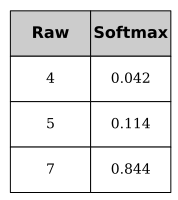

In [14]:
# table data
colLabs = ['Raw','Softmax']

tabdat = []
for xi,si in zip(x,sigma):
  tabdat.append([f'{xi:.0f}',f'{si:.3f}'])

# draw the table
fig, ax = plt.subplots(figsize=(2.7,3))
ax.set_axis_off()
ht = ax.table(
        cellText   = tabdat,
        colLabels  = colLabs,
        colColours = [(.8,.8,.8)] * len(colLabs),
        cellLoc    = 'center',
        loc        = 'upper left',
        )


# some adjustments to the fonts etc
ht.scale(1,3.8)
ht.auto_set_font_size(False)
ht.set_fontsize(14)

from matplotlib.font_manager import FontProperties
for (row, col), cell in ht.get_celld().items():
  cell.set_text_props(fontproperties=FontProperties(family='serif'))
  if row==0: cell.set_text_props(fontproperties=FontProperties(weight='bold',size=16))

# show table
plt.tight_layout()
plt.show()

In [15]:
# the data (marble color counts)
counts = np.array([ 40,30,20 ])

# softmax
num = np.exp(counts)
den = np.sum( np.exp(counts) )
sigma = num / den

# standard probabilities
probs = 100*counts / np.sum(counts)

# print the results
print('Softmax:')
print(sigma)

print(' ')
print('Probabilities:')
print(probs)

Softmax:
[9.99954600e-01 4.53978686e-05 2.06106005e-09]
 
Probabilities:
[44.44444444 33.33333333 22.22222222]


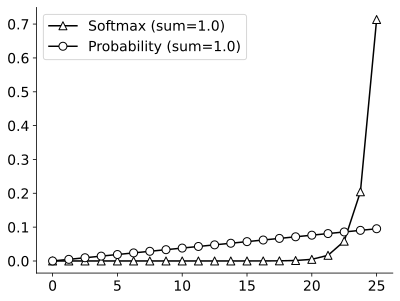

In [16]:
# with raw counts
x = np.linspace(0,25,21)
s = np.exp(x) / np.sum(np.exp(x))
p = x / np.sum(x)

plt.plot(x,s,'k^-',markerfacecolor='w',markersize=8,label=f'Softmax (sum={np.sum(s)})')
plt.plot(x,p,'ko-',markerfacecolor='w',markersize=8,label=f'Probability (sum={np.sum(p)})')
plt.legend()
plt.show()

### Fig 8.10: Softmax in linear and log space

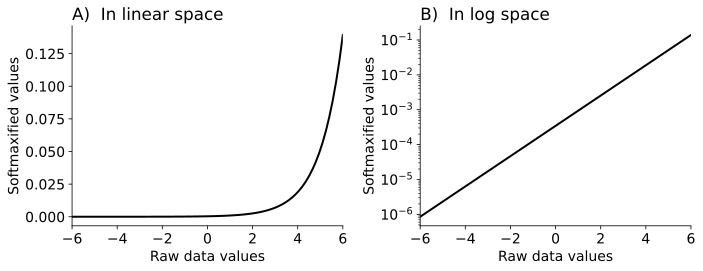

In [17]:
# with raw numerical data values
x = np.linspace(-6,6,81)
s = np.exp(x) / np.sum(np.exp(x))

_,axs = plt.subplots(1,2,figsize=(10,4))

for a in axs:
  a.plot(x,s,'k-',linewidth=2)
  a.set(xlabel='Raw data values',ylabel='Softmaxified values',xlim=x[[0,-1]])

axs[1].set_yscale('log')
axs[0].set_title(r'A)  In linear space')
axs[1].set_title(r'B)  In log space')

plt.tight_layout()
plt.show()